<h1> Capstone Project </h1>
<br>
I'm working on the Car Sale Advertisements of Ukraine which was colled by "Anton Bobanev" in 2016. Dataset contains 9576 rows and 10 variables. <br>
<br>car: manufacturer brand <br>
price: seller’s price in advertisement (in USD)<br>
body: car body type<br>
mileage: as mentioned in advertisement (‘000 Km)<br>
engV: rounded engine volume (‘000 cubic cm)<br>
engType: type of fuel (“Other” in this case should be treated as NA)<br>
registration: whether car registered in Ukraine or not<br>
year: year of production<br>
model: specific model name<br>
drive: drive type. <br>
<br>
Uploading the file on github for anyone to access and run <br>
Link: https://github.com/majmudar/CarAd_Ukraine_Analysis 

In [375]:
# Libraries used in this Python file.
import numpy as np 
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
%matplotlib inline
from bokeh.plotting import *
from bokeh.io import output_notebook 
output_notebook()
%matplotlib inline
import sklearn

Loading BokehJS ...

In [376]:
# reading the dataset from the file uploaded on github and then storing into Data Frame
df = pd.read_csv('https://raw.githubusercontent.com/majmudar/CarAd_Ukraine_Analysis/master/car_ad.csv', encoding='latin-1')
df.head(10)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
6,Honda,6500.0,sedan,199,2.0,Petrol,yes,2003,Accord,front
7,Renault,10500.0,vagon,185,1.5,Diesel,yes,2011,Megane,front
8,Mercedes-Benz,21500.0,sedan,146,1.8,Gas,yes,2012,E-Class,rear
9,Mercedes-Benz,22700.0,sedan,125,2.2,Diesel,yes,2010,E-Class,rear


In [377]:
#Shape of DataFrame
df.shape

(9576, 10)

In [378]:
#Data Exploring and Data cleaning 
df[df.price <= 0 ].head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
20,Land Rover,0.0,crossover,0,4.4,Diesel,yes,2016,Range Rover,full
53,Mercedes-Benz,0.0,crossover,0,3.0,Diesel,yes,2016,GLE-Class,full
70,Mercedes-Benz,0.0,crossover,0,3.0,Diesel,yes,2016,GLE-Class,full
71,Toyota,0.0,crossover,0,4.5,Diesel,yes,2016,Land Cruiser 200,full
90,Porsche,0.0,sedan,22,4.8,Petrol,yes,2014,Panamera,full


In [379]:
df.price[df.price <= 0 ].count()

267

In [380]:
df = df.drop(df[df.price <= 0 ].index)

In [381]:
df.shape

(9309, 10)

In [382]:
df.head(10)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
6,Honda,6500.0,sedan,199,2.0,Petrol,yes,2003,Accord,front
7,Renault,10500.0,vagon,185,1.5,Diesel,yes,2011,Megane,front
8,Mercedes-Benz,21500.0,sedan,146,1.8,Gas,yes,2012,E-Class,rear
9,Mercedes-Benz,22700.0,sedan,125,2.2,Diesel,yes,2010,E-Class,rear


In [383]:
df.price[df.price == 0].count()

0

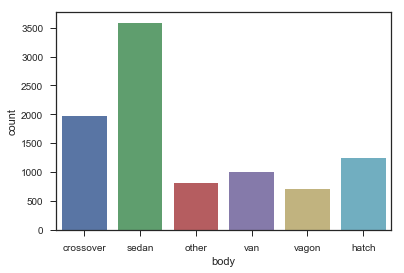

In [384]:
# counting the values in body by using Vizualization and getting insights of different field by comparing and visualizing them. 
sns.countplot(df['body'])

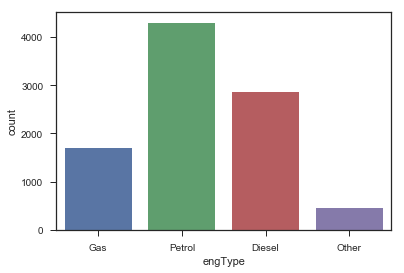

In [385]:
sns.countplot(df['engType'])

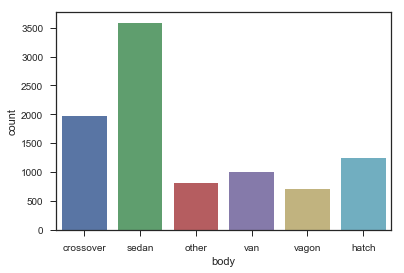

In [386]:
sns.countplot(df['body'])

In [387]:
avgprice_body = df.groupby('body').price.mean().reset_index()
avgprice_body

,body,price
0,crossover,31109.236881
1,hatch,8589.078084
2,other,19954.656964
3,sedan,12358.681077
4,vagon,8953.866340
5,van,10958.679220


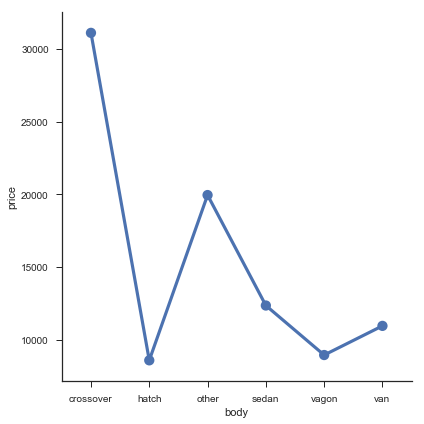

In [388]:
sns.factorplot(data = avgprice_body, x='body', y='price', size=6)

In [389]:
df.year.max()

2016

/Users/jainikmajmudar/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/Users/jainikmajmudar/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


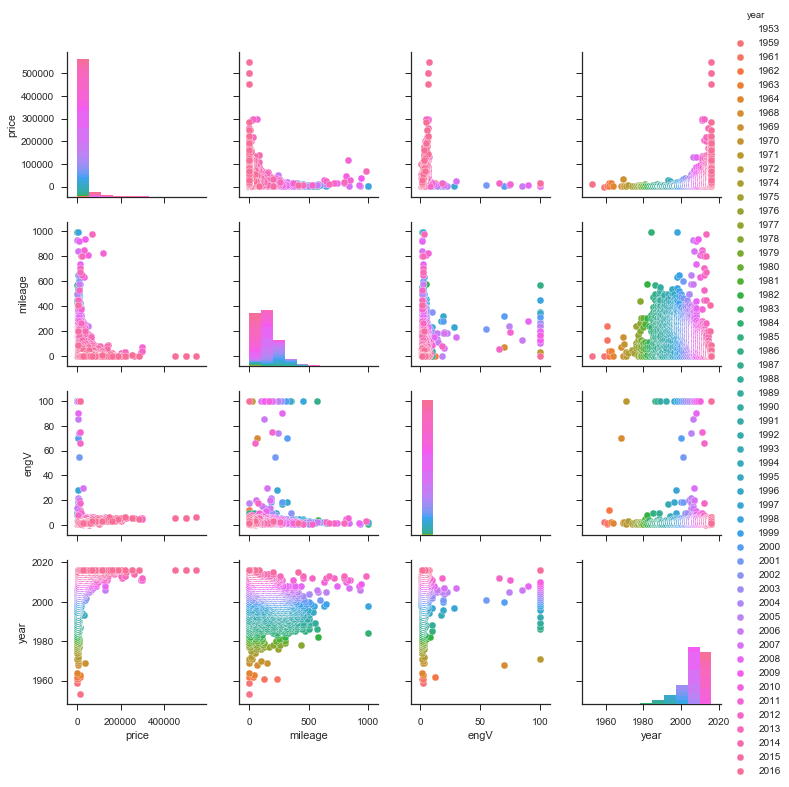

In [390]:
sns.set(style="ticks")
sns.pairplot(df, hue="year")

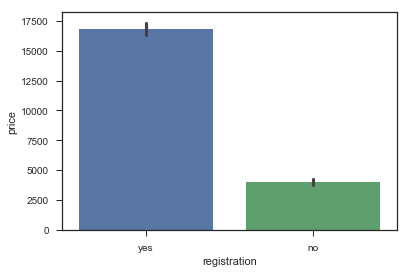

In [391]:
sns.barplot(x="registration", y="price", data=df)

<Container object of 9309 artists>

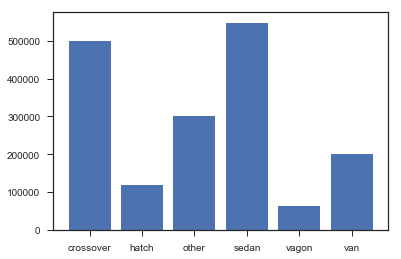

In [392]:
body = df.body
price = df.price
plt.bar(body, price, 0.8)

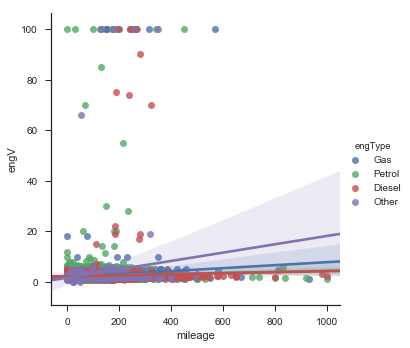

In [393]:
sns.lmplot(x="mileage", y="engV", hue="engType", data=df)

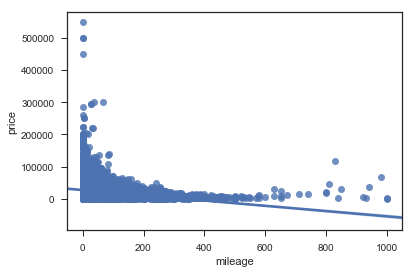

In [394]:
sns.regplot(x='mileage',y='price',data=df)

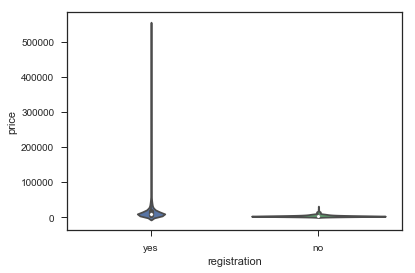

In [395]:
#Box plot vizualization
sns.violinplot(x="registration", y='price', data = df)

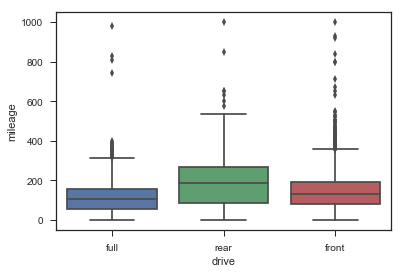

In [396]:
sns.boxplot(x="drive", y='mileage', data = df)

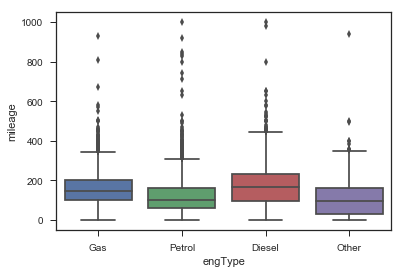

In [397]:
sns.boxplot(x="engType", y='mileage', data = df)

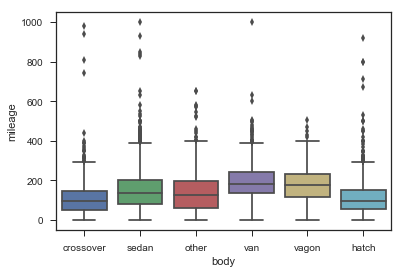

In [398]:
sns.boxplot(x="body", y='mileage', data = df)

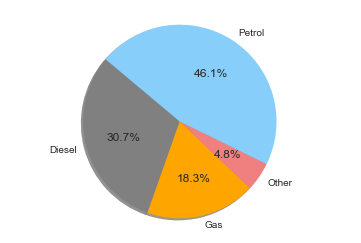

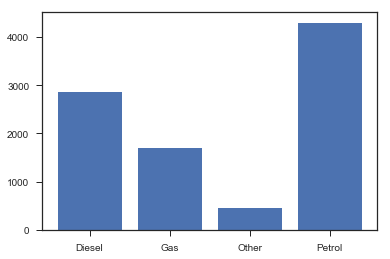

In [399]:
ct = pd.value_counts(df['engType'].values, sort=False)

labels = df['engType'].unique()
labels.sort()
sizes = ct
ct.sort_index(inplace=True)
colors = ['grey', 'orange', 'lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

y_pos = np.arange(len(labels))
pltd.bar(y_pos,sizes)
pltd.xticks(y_pos,labels)
pltd.show()

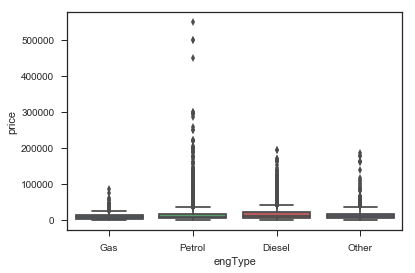

In [400]:
sns.boxplot(x="engType", y='price', data = df)

In [401]:
body = ['crossover', 'hatch', 'other', 'sedan', 'vagon', 'van']
mileage = df.mileage
p = figure(x_range = body)
p.vbar(x= body, width=0.75, bottom=0,
       top= mileage, color="grey")
show(p)
output_notebook()

/Users/jainikmajmudar/anaconda3/lib/python3.6/site-packages/bokeh/models/sources.py:137: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('top', 9309), ('x', 6)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


Loading BokehJS ...

In [402]:
# descriptive Statistics of the Data Frame
df.describe(include='all')

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,9309,9309.000000,9309,9309.00000,8884.000000,9309,9309,9309.000000,9309,8817
unique,86,NaN,6,NaN,NaN,4,2,NaN,880,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,908,NaN,3585,NaN,NaN,4296,8755,NaN,193,5111
mean,NaN,16081.710884,NaN,140.29552,2.629093,NaN,NaN,2006.523364,NaN,NaN
std,NaN,24301.899483,NaN,98.23421,5.920302,NaN,NaN,7.001367,NaN,NaN
min,NaN,259.350000,NaN,0.00000,0.100000,NaN,NaN,1953.000000,NaN,NaN
25%,NaN,5400.000000,NaN,71.00000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9500.000000,NaN,129.00000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,17000.000000,NaN,195.00000,2.500000,NaN,NaN,2012.000000,NaN,NaN


In [403]:
df.groupby('registration').mileage.mean()

registration
no     227.864621
yes    134.754312
Name: mileage, dtype: float64

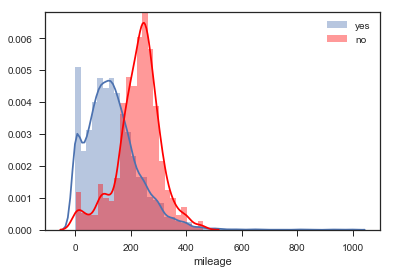

In [404]:
import statsmodels
import statsmodels.stats as stats

yes_mileage = df.loc[df['registration']=='yes', 'mileage']
no_mileage = df.loc[df['registration']=='no', 'mileage']

sns.distplot(yes_mileage)
sns.distplot(no_mileage, color='red')
plt.legend(['yes', 'no'])

In [405]:
from statsmodels.stats import weightstats as weightstats
weightstats.ttest_ind(gas_mileage, diesel_mileage, alternative='larger')

(-22.19971926962, 1.0, 9307.0)

In [406]:
# converting the columns into numeric for using and predicting the model 
from sklearn import model_selection, preprocessing
for c in df.columns:
    if df[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df[c].values)) 
        df[c] = lbl.transform(list(df[c].values))

In [407]:
df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,25,15500.0,0,68,2.5,1,1,2010,490,1
1,52,20500.0,3,173,1.8,1,1,2011,332,3
2,52,35000.0,2,135,5.5,3,1,2008,240,3
3,52,17800.0,5,162,1.8,0,1,2012,206,0
4,52,33000.0,4,91,NaN,2,1,2013,332,2


In [408]:
from patsy import dmatrices
y,x = dmatrices('price  ~ car + body + mileage + engV + engType + registration + year + model + drive', data=df)
print("y:{}".format(y.shape))
print("x:{}".format(x.shape))

y:(8884, 1)
x:(8884, 10)


In [409]:
x[0:10, :]

array([[1.000e+00, 2.500e+01, 0.000e+00, 6.800e+01, 2.500e+00, 1.000e+00,
        1.000e+00, 2.010e+03, 4.900e+02, 1.000e+00],
       [1.000e+00, 5.200e+01, 3.000e+00, 1.730e+02, 1.800e+00, 1.000e+00,
        1.000e+00, 2.011e+03, 3.320e+02, 3.000e+00],
       [1.000e+00, 5.200e+01, 2.000e+00, 1.350e+02, 5.500e+00, 3.000e+00,
        1.000e+00, 2.008e+03, 2.400e+02, 3.000e+00],
       [1.000e+00, 5.200e+01, 5.000e+00, 1.620e+02, 1.800e+00, 0.000e+00,
        1.000e+00, 2.012e+03, 2.060e+02, 0.000e+00],
       [1.000e+00, 5.700e+01, 0.000e+00, 8.300e+01, 2.000e+00, 3.000e+00,
        1.000e+00, 2.013e+03, 8.440e+02, 1.000e+00],
       [1.000e+00, 3.200e+01, 3.000e+00, 1.990e+02, 2.000e+00, 3.000e+00,
        1.000e+00, 2.003e+03, 1.790e+02, 0.000e+00],
       [1.000e+00, 6.200e+01, 4.000e+00, 1.850e+02, 1.500e+00, 0.000e+00,
        1.000e+00, 2.011e+03, 5.600e+02, 0.000e+00],
       [1.000e+00, 5.200e+01, 3.000e+00, 1.460e+02, 1.800e+00, 1.000e+00,
        1.000e+00, 2.012e+03, 3.320e+

In [410]:
# Using Liner Regression Model
from sklearn import linear_model
model = linear_model.LinearRegression(fit_intercept=False)
res = model.fit(x, y)

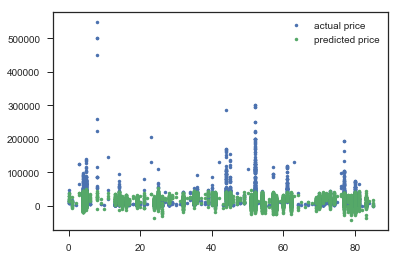

In [411]:
plt.plot(x[:,1], y, '.')
plt.plot(x[:,1], model.predict(x), '.')
plt.legend(['actual price', 'predicted price'])

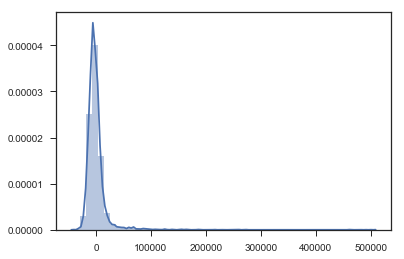

In [412]:
sns.distplot(y - model.predict(x))

In [413]:
y1 = y.flatten()
y2 = (model.predict(x)).flatten()
y3 = (y - model.predict(x)).flatten()

out1 = pd.DataFrame({'Actual_price': y1, 'predict_price': y2, 'Diff' :y3})
out1[['Actual_price','predict_price','Diff']].head(5)

,Actual_price,predict_price,Diff
0,15500.0,31550.307339,-16050.307339
1,20500.0,27805.915129,-7305.915129
2,35000.0,26514.893427,8485.106573
3,17800.0,11483.071671,6316.928329
4,16600.0,32324.472973,-15724.472973


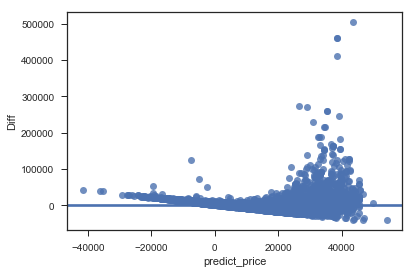

In [414]:
sns.regplot(out1['predict_price'],out1['Diff'])

In [415]:
# Using Random Forest Regressor Model
from sklearn import ensemble
model = sklearn.ensemble.RandomForestRegressor()
model.fit(x,y)

/Users/jainikmajmudar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

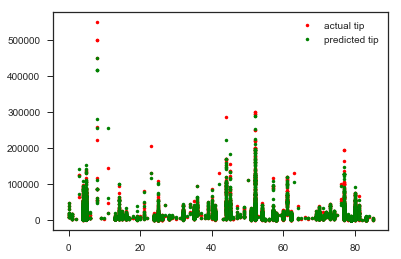

In [416]:
plt.plot(x[:,1], y, 'r.')
plt.plot(x[:,1], model.predict(x), 'g.')
plt.legend(['actual tip', 'predicted tip'])

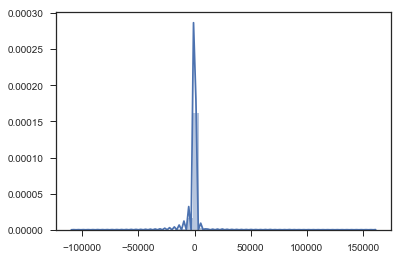

In [417]:
sns.distplot(y.ravel() - model.predict(x))

In [418]:
y.ravel()

array([15500., 20500., 35000., ..., 18500., 16999., 22500.])

In [419]:
y4 = y.ravel().flatten()
y5 = (model.predict(x)).flatten()
y6 = (y - model.predict(x)).flatten()

out2 = pd.DataFrame({'Actual_price': y1, 'predict_price': y2, 'Diff' :y3})
out2[['Actual_price','predict_price','Diff']].head(5)

,Actual_price,predict_price,Diff
0,15500.0,31550.307339,-16050.307339
1,20500.0,27805.915129,-7305.915129
2,35000.0,26514.893427,8485.106573
3,17800.0,11483.071671,6316.928329
4,16600.0,32324.472973,-15724.472973


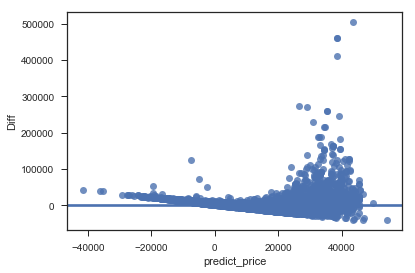

In [420]:
sns.regplot(out2['predict_price'],out2['Diff'])

In [421]:
# Classification of the Liner and Random Forest Regressor Model
df['price_lt_100000'] = (df['price']  < 100000).astype(np.float32)
df['price_lt_100000'].mean()

0.9850682020187378

In [422]:
model = sklearn.linear_model.LogisticRegression()
y,x = dmatrices('price_lt_100000 ~ car + body + mileage + engV + engType + registration + year + model + drive', data=df)
model.fit(x, y)
yhat = model.predict(x)
print(sklearn.metrics.classification_report(y, yhat))

             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00       130
        1.0       0.99      1.00      0.99      8754

avg / total       0.97      0.99      0.98      8884



/Users/jainikmajmudar/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [423]:
y, x = dmatrices('price_lt_100000 ~ car + body + mileage + engV + engType + registration + year + model + drive', data=df)
model = sklearn.ensemble.RandomForestClassifier()
model.fit(x,y)
yhat = model.predict(x)
print(sklearn.metrics.classification_report(y, yhat))

             precision    recall  f1-score   support

        0.0       0.97      0.98      0.97       130
        1.0       1.00      1.00      1.00      8754

avg / total       1.00      1.00      1.00      8884



/Users/jainikmajmudar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
